# Text Visualization

In [1]:
import pandas as pd 
data = pd.read_csv("train.tsv",sep = "\t")

In [2]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


# 1-) TEXT PREPROCESSING

## 1.1-)Converting all letters into Lowercase in the text

In [4]:
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(i.lower() for i in x.split()))

In [5]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


## 1.2-)Deleting Punctuation Marks

In [6]:
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

In [7]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


## 1. 3-) Deleting Numbers

In [8]:
data['Phrase'] = data['Phrase'].str.replace('\d','')

In [9]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2


## 1.4-)Deleting Stopwords

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(i for i in x.split() if i not in sw))

In [12]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


## 1.5-)Deleting of words with low frequency

In [13]:
words=pd.Series(' '.join(data['Phrase']).split())

In [14]:
words

0                series
1             escapades
2         demonstrating
3                 adage
4                  good
              ...      
611548         chortles
611549        avuncular
611550         chortles
611551        avuncular
611552         chortles
Length: 611553, dtype: object

In [15]:
words.value_counts()# frequency of the words

film               6689
movie              5905
nt                 3970
one                3609
like               3071
                   ... 
underventilated       1
unsaid                1
overstylized          1
joshua                1
prechewed             1
Length: 16079, dtype: int64

In [16]:
words.value_counts()[0:1000]# words with the highest frequency

film           6689
movie          5905
nt             3970
one            3609
like           3071
               ... 
quietly         107
sight           107
williams        107
growing         106
essentially     106
Length: 1000, dtype: int64

In [17]:
deleting_words=words.value_counts()[-1000:]# words with the lowest frequency
deleting_words

riseandfall        5
scouse             5
seriocomic         5
naqoyqatsi         5
lucks              5
                  ..
underventilated    1
unsaid             1
overstylized       1
joshua             1
prechewed          1
Length: 1000, dtype: int64

In [18]:
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(i for i in x.split() if i not in deleting_words))

In [19]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series demonstrating adage good goose also goo...,1
1,2,1,series demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


## 1.6-)Lemmatization

In [20]:
from textblob import Word

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [23]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series demonstrating adage good goose also goo...,1
1,2,1,series demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


In [24]:
data['Phrase'].head(10)

0    series demonstrating adage good goose also goo...
1                series demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5                       demonstrating adage good goose
6                                                     
7                       demonstrating adage good goose
8                                                     
9                       demonstrating adage good goose
Name: Phrase, dtype: object

# 2-) Text Visualization with WordCloud

In [27]:
# !pip install wordcloud

In [28]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## 2.1)Visualization of only one line text 

In [31]:
text = data["Phrase"][0]
text                      

'series demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [32]:
wordcloud = WordCloud().generate(text)

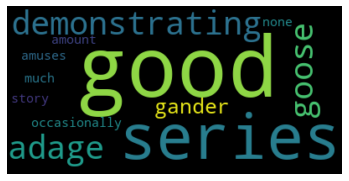

In [33]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

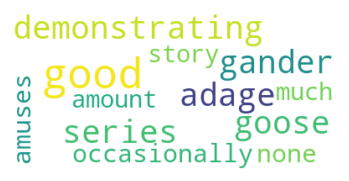

In [39]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## 2.1)Visualization of whole text 

In [46]:
text_whole = " ".join(i for i in data["Phrase"])

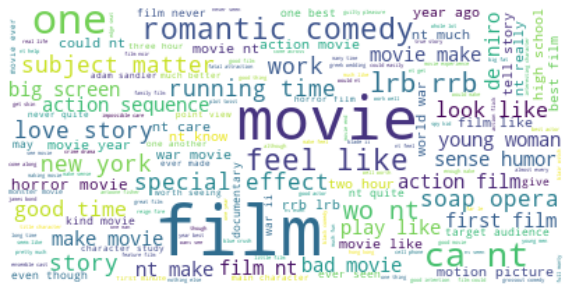

In [49]:
wordcloud = WordCloud(max_font_size = 50,
                    
                     background_color = "white").generate(text_whole)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()